# INVESTIGATION OF THE WORLD POPULATION DATASET

![TMDB Movies](world-map.jpg)

## Executive Summary

## Table of Contents
- [Introduction](#introduction)
- [Environment Configuration](#environment-configuration)
- [Data Collection](#data-collection)
- [Data Wrangling Phase](#data-wrangling)
- [Data Cleaning Phase](#data-cleaning)
- [Data Analysis](#data-analysis)
- [Results and Findings](#results-and-findings)
- [References and Resources](#references-and-resources)

### <a id="introduction">Introduction</a>

In this Dataset from <a href="https://worldpopulationreview.com">worldpopulationreview.com</a>, we have historical population data for every country in the world by different parameters like Area Size of the Country/Territory, Name of the Continent, Name of the Capital, Density, Population Growth Rate, Ranking based on Population, World Population Percentage, etc. In this project, i will investigate a subset of this database using popular python libraries like NumPy, Pandas, and Matplotlib, among others, in order to answer the following 10 questions:

<ol>
    <li>Which continent had the highest average population growth rate between 1990 and 2020?</li>
    <li>What was the average decline in population growth between 1970 and 2000?</li>
    <li>Which countries exhibit outlier-like behavior in terms of their population growth rates?</li>
    <li>What is the average population growth of African countries? How does it compare to other continents?</li>
    <li>Compare the population growth rates of African countries with those of Asian countries.</li>
    <li>Which 2 continents constitute the smallest global population percentage?</li>
    <li>Find two countries that exhibited outlier-like behavior in their population growth between 1980 and 2020.</li>
    <li>Investigate the continental relationship between a country’s population growth and population density.</li>
    <li>Explore the correlation between a country’s land area and its population growth in the last three decades.</li>
    <li>Determine the net population growth of the 20 biggest countries in the world between 1980 and 2015.</li>
</ol>

### <a id="environment-configuration">Environment Configuration</a>

In the section, I import and configure the environmental packages, scripts and global variables needed for the subsequent sections.

#### Importation of Packages

In [1]:
from IPython.display import clear_output
import subprocess

# install packages
%pip install numpy pandas matplotlib

clear_output()

In [2]:
target_packages = ['numpy', 'pandas', 'matplotlib']
installed_packages = subprocess.check_output(['pip', 'list']).decode('utf-8')

print("\n".join([f"{package} : installed." if package in installed_packages else f"{package} : not installed." for package in target_packages]))

numpy : installed.
pandas : installed.
matplotlib : installed.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# styles from print(plt.style.available)
styles = ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', 
 '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 
 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 
 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 
 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 
 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 
 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 
 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 
 'tableau-colorblind10']

plt.style.use('seaborn-whitegrid')

### <a id="data-collection">Data Collection</a>

In this section, I load the raw dataset to investigate into memory - from a CSV file called data.csv.

In [5]:
dirty_df = pd.read_csv('data.csv')

### <a id="data-wrangling">Data Wrangling</a>

Also called data mungling or data remediation, in this section, I analyse the active raw dataset to fully understand its structural and contextual state. Additionally, I endavour to convert this raw dataset into a useable high quality form.

In [6]:
dirty_df.shape

(234, 17)

<i>The dataset has 17 columns and 234 rows.</i>

In [7]:
dirty_df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [8]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

<i>All columns are of the appropriate data types and no null values are present in the entire dataset.</i>

In [9]:
dirty_df.duplicated().sum()

0

<i>There aren't any duplicate rows (accross all columns) in the entire dataset.</i>

In [10]:
dirty_df.nunique()

Rank                           234
CCA3                           234
Country/Territory              234
Capital                        234
Continent                        6
2022 Population                234
2020 Population                234
2015 Population                234
2010 Population                234
2000 Population                234
1990 Population                234
1980 Population                234
1970 Population                234
Area (km²)                     233
Density (per km²)              234
Growth Rate                    180
World Population Percentage     70
dtype: int64

<i>All column values seem to resonate with expected uniqueness constraints.</i>

In [11]:
dirty_df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


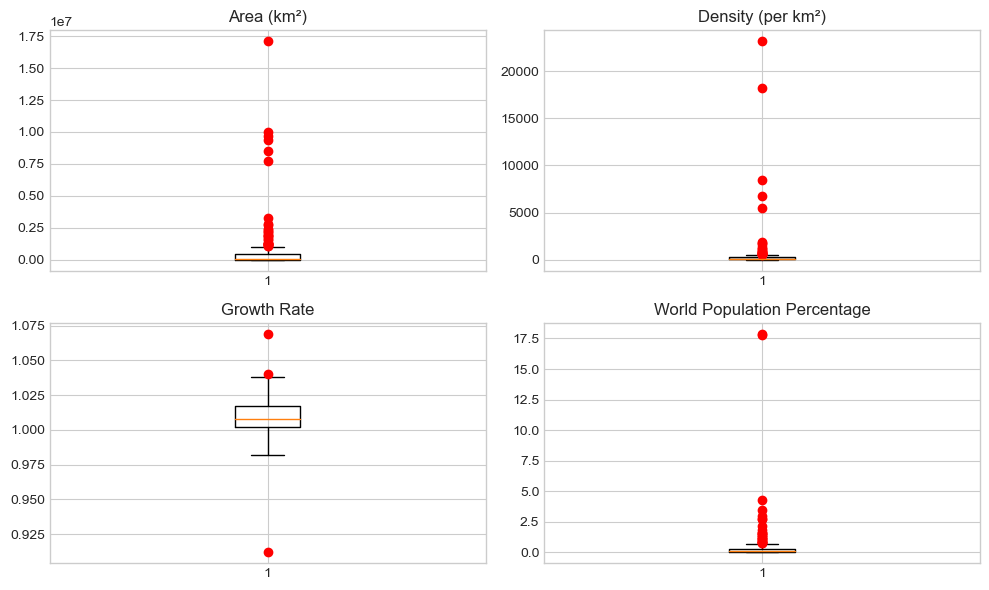

In [12]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.boxplot(dirty_df['Area (km²)'], sym='r')
plt.title('Area (km²)')

plt.subplot(2, 2, 2)
plt.boxplot(dirty_df['Density (per km²)'], sym='r')
plt.title('Density (per km²)')

plt.subplot(2, 2, 3)
plt.boxplot(dirty_df['Growth Rate'], sym='r')
plt.title('Growth Rate')

plt.subplot(2, 2, 4)
plt.boxplot(dirty_df['World Population Percentage'], sym='r')
plt.title('World Population Percentage')

plt.tight_layout()
plt.show()

In [13]:
#outlier countries in area
sorted_dirty_df = dirty_df.sort_values(by='Area (km²)', ascending=False)

print(list(sorted_dirty_df['Country/Territory'][:7]))

['Russia', 'Canada', 'China', 'United States', 'Brazil', 'Australia', 'India']


In [14]:
#outlier countries in Density (per km²)
sorted_dirty_df = dirty_df.sort_values(by='Density (per km²)', ascending=False)

print(list(sorted_dirty_df['Country/Territory'][:5]))

['Macau', 'Monaco', 'Singapore', 'Hong Kong', 'Gibraltar']


In [15]:
#outlier countries in Growth Rate
sorted_dirty_df = dirty_df.sort_values(by='Growth Rate', ascending=False)

print(list(sorted_dirty_df['Country/Territory'][:2]) + list(sorted_dirty_df['Country/Territory'][-1:]))

['Moldova', 'Poland', 'Ukraine']


In [16]:
#outlier countries in World Population Percentage
sorted_dirty_df = dirty_df.sort_values(by='World Population Percentage', ascending=False)

print(list(sorted_dirty_df['Country/Territory'][:2]))

['China', 'India']


<i>Some rows exhibit outlier behaviour across the following columns as follows:</i>

<ol>
    <i><li><strong>Area (km²):</strong> 7 countries exhibit an extreme positive outlier tendency. Russia has the highest positive outlier tendecy by far, with the remaining six countries (Canada, China, United States, Brazil, Australia and India in that order) clustered together.</li></i>
    <i><li><strong>Density (per km²):</strong> 5 countries exhibit an extreme positive outlier tendency, that is Macau, Monaco, Singapore, Hong Kong and Gilbraltar, in that order.</li></i>
    <i><li><strong>Growth Rate:</strong> 2 countries exhibit a positive outlier tendency. In this case, Moldova exhibits an extreme positive outlier tendency whereas Poland exhibits a mild positive outlier tendency. On the other hand, 1 country, that is Ukraine, exhibits an extreme negative outlier tendency.</li></i>
    <i><li><strong>World Population Percentage:</strong> In this case, 2 countries, that is China and India in that order, exhibit an extreme positive outlier tenndecy.</li></i>
</ol>

<i>🔊 It is to note, that, because these positive and negative outlier tendencies in country size, population density, population growth rate and percentage global population share per nation are expected and valid representations, these will be retained in our dataset for analysis.</i>

<i><strong>Data Wrangling Remarks:</strong></i>

<i>This dataset has 17 columns and 234 row. All columns are of the appropriate data types and no null values are present in the entire dataset. There aren't any duplicate rows (accross all columns) in the entire dataset. All column values seem to resonate with expected uniqueness constraints.</i>

### <a id="data-cleaning">Data Cleaning</a>

In [17]:
df = dirty_df.copy()

##### Dropping unecessary columns

In [18]:
unecessary_columns =['Rank', 'CCA3',  'Capital']
df.drop(columns = unecessary_columns,inplace=True)
df.head(2)

,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04


#### Renaming the columns

In [19]:
df.rename(columns={'Country/Territory':'country', 'Continent':'continent','2022 Population':'P2022','2020 Population':'P2020','2015 Population':'P2015','2010 Population':'P2010','2000 Population':'P2000',
'1990 Population':'P1990','1980 Population':'P1980','1970 Population':'P1970','Area (km²)':'area','Density (per km²)':'density','Growth Rate':'growth_rate','World Population Percentage':'population_percentage'}, inplace=True)

df.head(2)

,country,continent,P2022,P2020,P2015,P2010,P2000,P1990,P1980,P1970,area,density,growth_rate,population_percentage
0,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04


### <a id="data-analysis">Data Analysis</a>

#### Continent with the highest average population growth rate between 1990 and 2020.

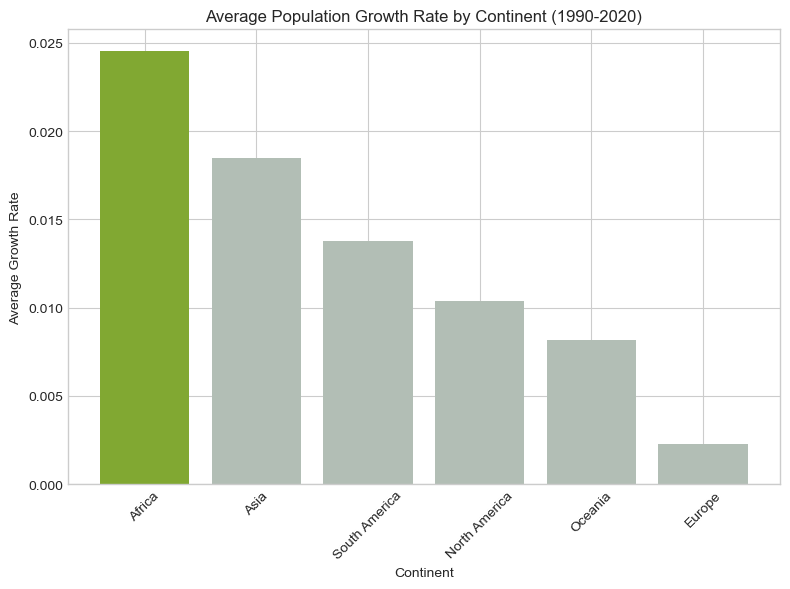

In [20]:
sub_df = df[['country','continent', 'P1990', 'P2020']].copy()

sub_df.loc[:,("avg_growth_rate")] = (sub_df["P2020"] / sub_df["P1990"]) ** (1/(2020 - 1990)) - 1

continental_avg_growth_rate = sub_df.groupby('continent')['avg_growth_rate'].mean()
continental_avg_growth_rate = continental_avg_growth_rate.sort_values(ascending=False)

max_continent = continental_avg_growth_rate.idxmax()
max_avg_growth_rate = continental_avg_growth_rate.max()

plt.figure(figsize=(8, 6))

plt.bar(continental_avg_growth_rate.index, continental_avg_growth_rate.values, color=['#81a832'] * 1 + ['#B2BEB5'] * 5)
plt.xlabel("Continent")
plt.ylabel("Average Growth Rate")
plt.title("Average Population Growth Rate by Continent (1990-2020)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<i><strong>Africa with 24.5%</strong> had the highest average populaton growth rate between 1990 and 2020.</i>

#### Average decline in population growth between 1970 and 2000.

In [21]:
sub_df = df[['country','continent', 'P1970', 'P2000']].copy()

sub_df.loc[:, ('population_decline')] = sub_df['P2000'] - sub_df['P1970']

avg_decline = sub_df["population_decline"].mean()

if int(avg_decline) < 0:
    formatted_number = f"+ {format(int(avg_decline), ',')}"
else:
    formatted_number = f"- {format(int(avg_decline), ',')}"
    
print(formatted_number)

- 10,482,560


<i>The average decline in population growth between 1970 and 2000 was <strong>- 10,482,560</strong>.</i>

#### Countries exhibiting outlier-like behaviour in terms of their population growth rates.

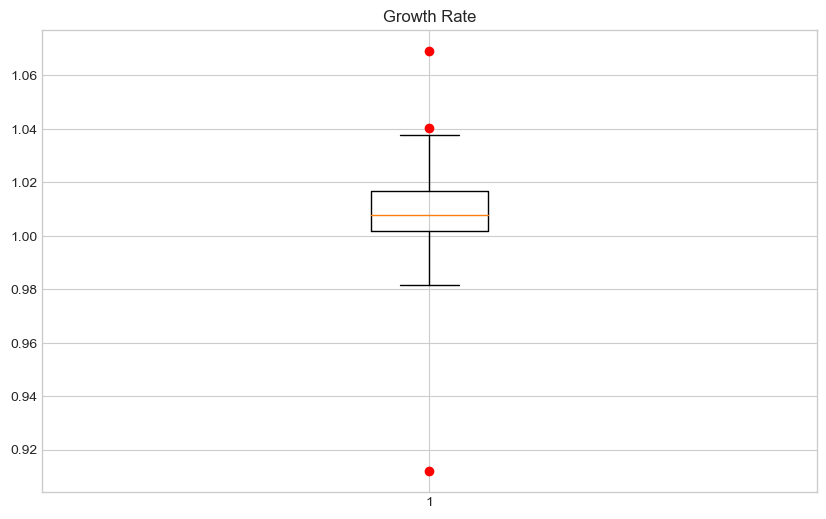

In [22]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)
plt.boxplot(df['growth_rate'], sym='r')
plt.title('Growth Rate')

plt.show()

In [23]:
sorted_dirty_df = dirty_df.sort_values(by='Growth Rate', ascending=False)

print(list(sorted_dirty_df['Country/Territory'][:2]) + list(sorted_dirty_df['Country/Territory'][-1:]))

['Moldova', 'Poland', 'Ukraine']


<i>Three countries exhibited outlier behaviour in terms of their population growth rates. Both <strong>moldova</strong> and <strong>Poland</strong> exhibited extreme positive tendencies whereas <strong>Ukraine</strong> exhibited extreme negative tendencies.</i>

#### Comparison of average population growth of African countries with other continents.

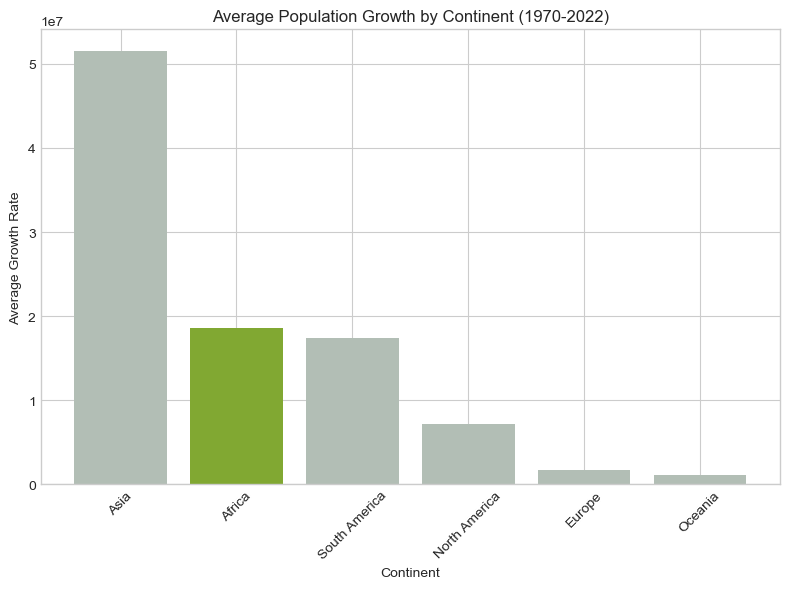

In [24]:
sub_df = df[['country','continent', 'P1970', 'P2022']].copy()

sub_df.loc[:,("population_growth")] = sub_df["P2022"] - sub_df["P1970"]

continental_avg_growth = sub_df.groupby('continent')['population_growth'].mean()
continental_avg_growth = continental_avg_growth.sort_values(ascending=False)

plt.figure(figsize=(8, 6))

plt.bar(continental_avg_growth.index, continental_avg_growth.values, color=np.where(continental_avg_growth.index == 'Africa', '#81a832', '#B2BEB5')) 
plt.xlabel("Continent")
plt.ylabel("Average Growth Rate")
plt.title("Average Population Growth by Continent (1970-2022)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<i>Africa had the second highest average population growth after Asia, closely followed vy South America, North Maerica, Europe and oceania, in that order.</i>

#### Comparison of population growth rates of African countries with those of Asian countries.

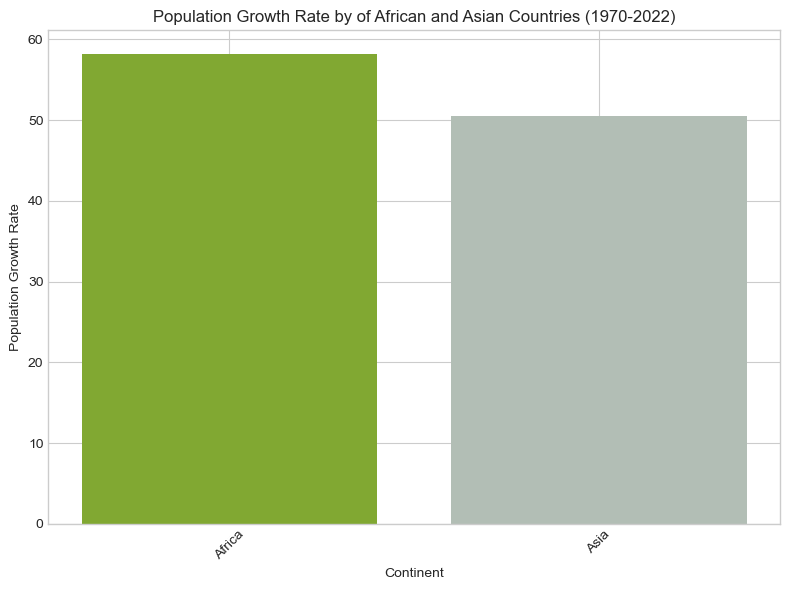

continent
Africa    58.2109
Asia      50.4692
Name: growth_rate, dtype: float64

In [25]:
sub_df = df[['country','continent', 'growth_rate']].copy()

sub_df = sub_df[(sub_df['continent'] == 'Africa') | (sub_df['continent'] == 'Asia')]

continental_growth_rate = sub_df.groupby('continent')['growth_rate'].sum()
continental_growth_rate = continental_growth_rate.sort_values(ascending=False)

plt.figure(figsize=(8, 6))

plt.bar(continental_growth_rate.index, continental_growth_rate.values, color=['#81a832'] * 1 + ['#B2BEB5'] * 1)
plt.xlabel("Continent")
plt.ylabel("Population Growth Rate")
plt.title("Population Growth Rate by of African and Asian Countries (1970-2022)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

continental_growth_rate

<i>African countries had higher collective population growth rate <strong>(58.2109)</strong> than Asian countries <strong>(50.4692)</strong> between 1970 and 2022.</i>

#### The 2 continents that constitute the smallest global percentage population.

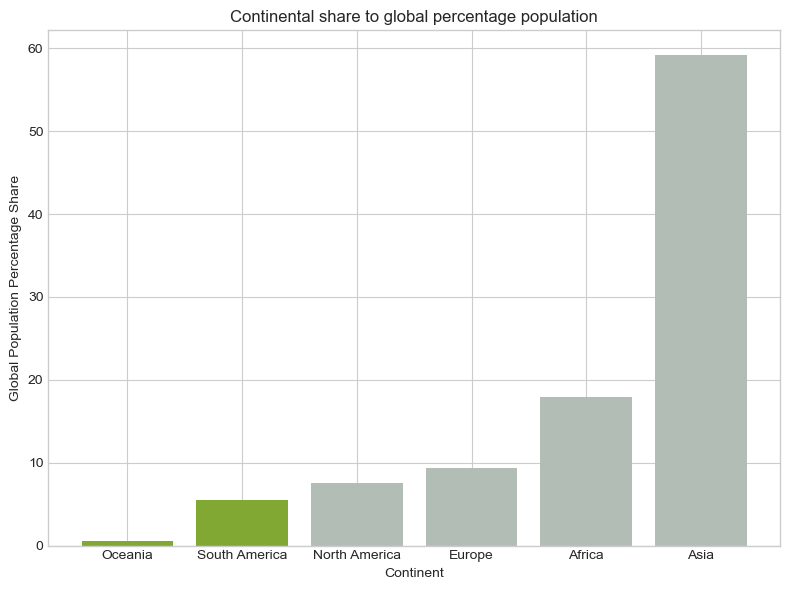

continent
Oceania           0.55
South America     5.48
North America     7.51
Europe            9.33
Africa           17.87
Asia             59.19
Name: population_percentage, dtype: float64

In [26]:
sub_df = df[['continent', 'population_percentage']].copy()

continental_population_percentages = sub_df.groupby('continent')['population_percentage'].sum()
continental_population_percentages = continental_population_percentages.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
plt.bar(continental_population_percentages.index, continental_population_percentages.values, color=['#81a832'] * 2 + ['#B2BEB5'] * 5)
plt.xlabel("Continent")
plt.ylabel("Global Population Percentage Share")
plt.title("Continental share to global percentage population")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

continental_population_percentages

<i>The 2 continents that constitute the smallest global population percentage are <strong>Oceania - 0.55%</strong> and <strong>South America - 5.48%</strong>.</i>

#### The 2 countries that exhibit outlier-ike behaviour in their population growth between 1980 and 2020.

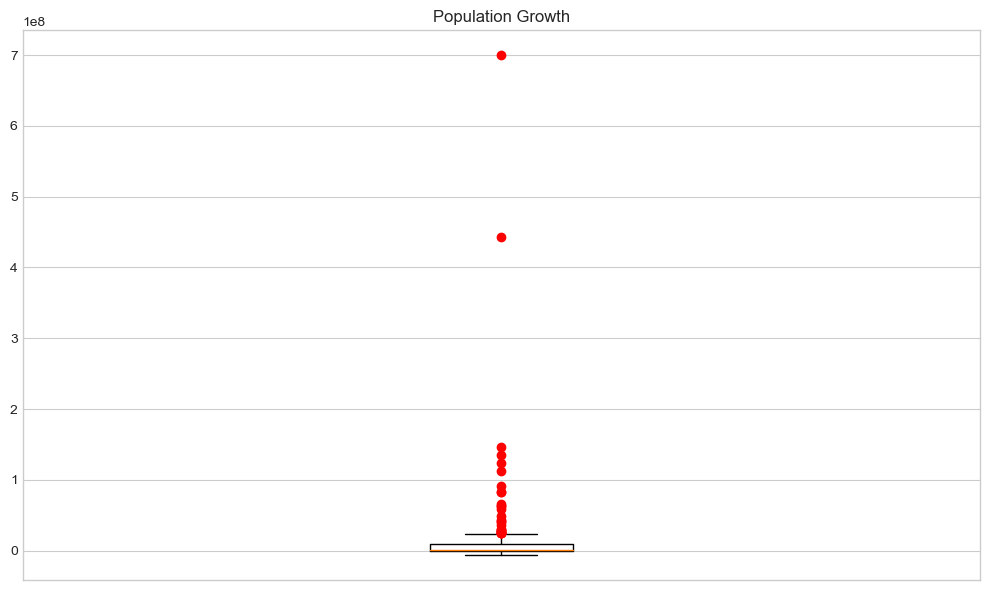

92    India
41    China
Name: country, dtype: object

In [27]:
sub_df = df[['country','continent', 'P1980', 'P2020']].copy()

sub_df.loc[:,("population_growth")] = sub_df["P2020"] - sub_df["P1980"]

plt.figure(figsize=(10, 6))
plt.boxplot(sub_df['population_growth'], sym='r')
plt.title('Population Growth')

outliers = sub_df.sort_values(by='population_growth', ascending=False).head(2)

box_positions = range(1, len(sub_df['population_growth']) + 1)

for index, row in outliers.iterrows():
    x_position = box_positions[sub_df.index.get_loc(index)]
    plt.annotate(row['country'], xy=(0, row['population_growth']),
                 xytext=(20, 5), textcoords='offset points',
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='red', rotation=45)
    
plt.xticks([])
plt.tight_layout()
plt.show()

outliers['country']

<i>The 2 countries that exhibit outlier-ike behaviour in their population growth between 1980 and 2020 are <strong>India and China</strong></i>

#### Continental relationship between a country's population growth and its population density.

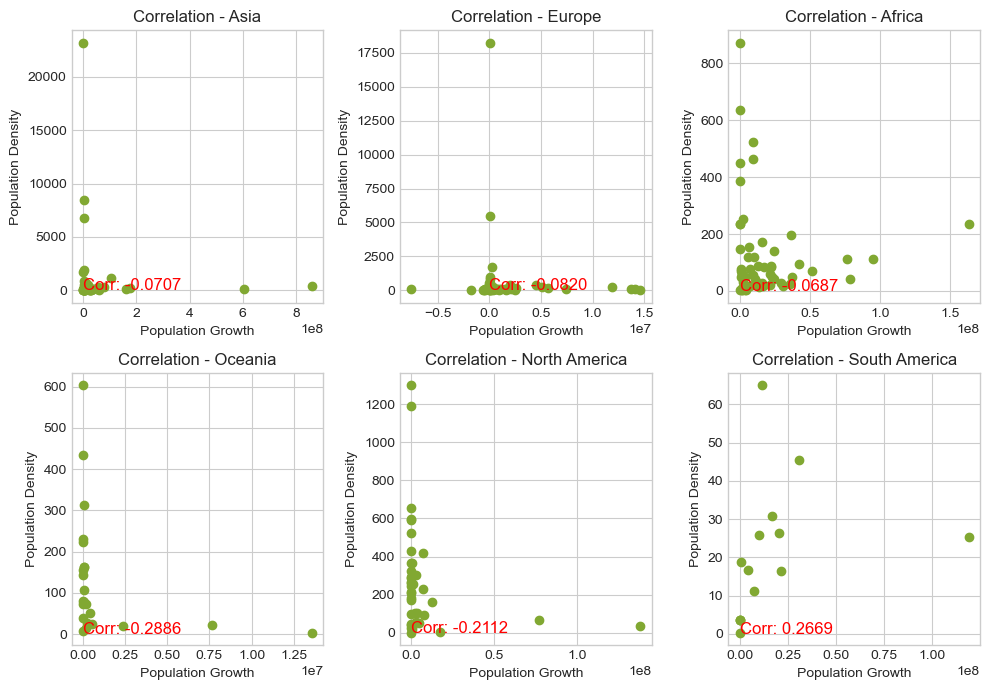

In [28]:
sub_df = df[['country','continent', 'P1970', 'P2022', 'density']].copy()

sub_df.loc[:,("population_growth")] = sub_df["P2022"] - sub_df["P1970"]

continents = list(sub_df['continent'].unique())

fig, axes = plt.subplots(2, 3, figsize=(10, 7))

for index, continent in enumerate(continents):
    correlation = sub_df[sub_df['continent'] == continent]['population_growth'].corr(sub_df[sub_df['continent'] == continent]['density'])
    
    ax = axes[index // 3, index % 3]
    ax.scatter(sub_df[sub_df['continent'] == continent]['population_growth'], sub_df[sub_df['continent'] == continent]['density'], color='#81a832')
    ax.set_title(f'Correlation - {continent}')
    ax.set_xlabel('Population Growth')
    ax.set_ylabel('Population Density')
    ax.text(0, 0, f'Corr: {correlation:.4f}', color='red', fontsize=12)

plt.tight_layout()
plt.show()


<i>
    Below is a description of the continental correlations of the population growth and population density of constituent countries:
</i>

<ol>
    <i><li><strong>Asia ___ 0.0707:</strong> A positive correlation of 0.0707 indicates a weak positive relationship between population growth and population density. This means that countries with higher population growth tended to have slightly higher population densities, but the relationship was not very strong</li></i>
    <i><li><strong>Europe ___ -0.0820:</strong> A negative correlation of -0.0820 indicates a weak negative relationship between population growth and population density. This suggests that countries with higher population growth tended to have slightly lower population densities, but again, the relationship was not very strong.</li></i>
    <i><li><strong>Africa ___ -0.0687:</strong> Similar to the previous correlation, a negative correlation of -0.0687 suggests a weak negative relationship between population growth and population density. Countries with higher population growth had slightly lower population densities, but the effect was not prominent.</li></i>
    <i><li><strong>Oceania ___ -0.2886:</strong> A negative correlation of -0.2886 indicates a moderate negative relationship between population growth and population density. This implies that countries with higher population growth had lower population densities. The relationship was somewhat stronger than the previous correlations.</li></i>
    <i><li><strong>North Aamerica ___ -0.2112:</strong> Another negative correlation, -0.2112 indicates a moderate negative relationship between population growth and population density. Countries with higher population growth had lower population densities, with a noticeable but not strong effect.</li></i>
    <i><li><strong>South America ___ 0.2669:</strong> A positive correlation of 0.2669 suggests a moderate positive relationship between population growth and population density. This means that countries with higher population growth tended to have higher population densities. The relationship was relatively stronger compared to some of the other correlations.</li></i>
</ol>

<i>Please note that the strength of these correlations is assessed based on the magnitude of the correlation coefficient. A correlation close to 0 indicates a weak relationship, while correlations further from 0 indicate stronger relationships. However, even a strong correlation does not necessarily imply causation, and other factors might be influencing these relationships</i>

#### Correlation between a country's land area and its population growth in the last three decades.

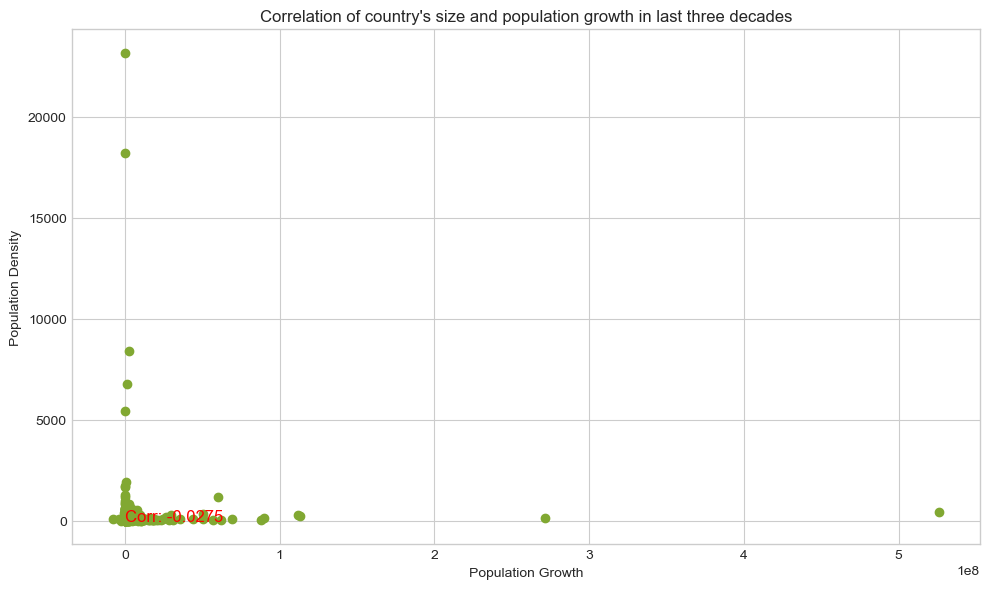

In [29]:
sub_df = df[['country', 'continent', 'P1990', 'P2020', 'density']].copy()

sub_df['population_growth'] = sub_df['P2020'] - sub_df['P1990']

plt.figure(figsize=(10, 6))

correlation = sub_df['population_growth'].corr(sub_df['density'])

plt.scatter(sub_df['population_growth'], sub_df['density'], color='#81a832')
plt.title("Correlation of country's size and population growth in last three decades")
plt.xlabel('Population Growth')
plt.ylabel('Population Density')
plt.text(0, 0, f'Corr: {correlation:.4f}', color='red', fontsize=12)

plt.tight_layout()
plt.show()


<i>For country size and population growth in the last three decades, a correlation coefficient of <strong>-0.0275</strong> indicates a weak negative correlation between population growth and population density. In this context; The negative sign indicates an inverse relationship between population growth and population density. As one variable increases, the other tends to decrease, and vice versa. The value of <strong>-0.0275</strong> is very close to zero, which implies a weak correlation. This suggests that there is little to no linear relationship between changes in population growth and population density. In other words, changes in population growth are not strongly associated with changes in population density.</i>

<i>This correlation value suggests that, on average, there is no significant trend linking population growth with population density across the countries in the dataset. Other factors or variables might have a more dominant influence on changes in population growth and density. Therefore, a change in one variable does not consistently predict a proportional change in the other. It's important to note that correlation does not imply causation. While a weak correlation suggests that the two variables are not strongly related, it does not provide insight into the specific reasons or mechanisms behind their behaviors.</i>

#### Net population growth of the 20 biggest countries in the world between 1980 and 2015.

In [30]:
sub_df = df[['country', 'P1980', 'P2015', 'area']].copy()

sub_df = sub_df.sort_values(by='area', ascending=False).head(20)

sub_df.loc[:,("population_growth")] = sub_df["P2015"] - sub_df["P1980"]

print(format(sub_df['population_growth'].sum(), ','))

1,608,568,858


<i>The top 20 biggest countries in the world had a collective net population growth of <strong>1,608,568,858</strong> people between 1980 and 2015.</i>

### <a id="results-and-findings">Results and Findings</a>

<i><strong>Africa with 24.5%</strong> had the highest average populaton growth rate between 1990 and 2020.</i>

<i>The average decline in population growth between 1970 and 2000 was <strong>- 10,482,560</strong>.</i>

<i>Three countries exhibited outlier behaviour in terms of their population growth rates. Both <strong>moldova</strong> and <strong>Poland</strong> exhibited extreme positive tendencies whereas <strong>Ukraine</strong> exhibited extreme negative tendencies.</i>

<i>Africa had the second highest average population growth after Asia, closely followed vy South America, North Maerica, Europe and oceania, in that order.</i>

<i>African countries had higher collective population growth rate <strong>(58.2109)</strong> than Asian countries <strong>(50.4692)</strong> between 1970 and 2022.</i>

<i>The 2 continents that constitute the smallest global population percentage are <strong>Oceania - 0.55%</strong> and <strong>South America - 5.48%</strong>.</i>

<i>The 2 countries that exhibit outlier-ike behaviour in their population growth between 1980 and 2020 are <strong>India and China</strong></i>

<i>
    Below is a description of the continental correlations of the population growth and population density of constituent countries:
</i>

<ol>
    <i><li><strong>Asia ___ 0.0707:</strong> A positive correlation of 0.0707 indicates a weak positive relationship between population growth and population density. This means that countries with higher population growth tended to have slightly higher population densities, but the relationship was not very strong</li></i>
    <i><li><strong>Europe ___ -0.0820:</strong> A negative correlation of -0.0820 indicates a weak negative relationship between population growth and population density. This suggests that countries with higher population growth tended to have slightly lower population densities, but again, the relationship was not very strong.</li></i>
    <i><li><strong>Africa ___ -0.0687:</strong> Similar to the previous correlation, a negative correlation of -0.0687 suggests a weak negative relationship between population growth and population density. Countries with higher population growth had slightly lower population densities, but the effect was not prominent.</li></i>
    <i><li><strong>Oceania ___ -0.2886:</strong> A negative correlation of -0.2886 indicates a moderate negative relationship between population growth and population density. This implies that countries with higher population growth had lower population densities. The relationship was somewhat stronger than the previous correlations.</li></i>
    <i><li><strong>North Aamerica ___ -0.2112:</strong> Another negative correlation, -0.2112 indicates a moderate negative relationship between population growth and population density. Countries with higher population growth had lower population densities, with a noticeable but not strong effect.</li></i>
    <i><li><strong>South America ___ 0.2669:</strong> A positive correlation of 0.2669 suggests a moderate positive relationship between population growth and population density. This means that countries with higher population growth tended to have higher population densities. The relationship was relatively stronger compared to some of the other correlations.</li></i>
</ol>

<i>Please note that the strength of these correlations is assessed based on the magnitude of the correlation coefficient. A correlation close to 0 indicates a weak relationship, while correlations further from 0 indicate stronger relationships. However, even a strong correlation does not necessarily imply causation, and other factors might be influencing these relationships</i>

<i>For country size and population growth in the last three decades, a correlation coefficient of <strong>-0.0275</strong> indicates a weak negative correlation between population growth and population density. In this context; The negative sign indicates an inverse relationship between population growth and population density. As one variable increases, the other tends to decrease, and vice versa. The value of <strong>-0.0275</strong> is very close to zero, which implies a weak correlation. This suggests that there is little to no linear relationship between changes in population growth and population density. In other words, changes in population growth are not strongly associated with changes in population density.</i>

<i>This correlation value suggests that, on average, there is no significant trend linking population growth with population density across the countries in the dataset. Other factors or variables might have a more dominant influence on changes in population growth and density. Therefore, a change in one variable does not consistently predict a proportional change in the other. It's important to note that correlation does not imply causation. While a weak correlation suggests that the two variables are not strongly related, it does not provide insight into the specific reasons or mechanisms behind their behaviors.</i>

### <a id="references-and-resources">References and Resources</a>

- [World Population Preview](https://worldpopulationreview.com/)
- [Compound Annual Growth Rate](https://en.wikipedia.org/wiki/Compound_annual_growth_rate)
- [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)